### Markowitz Model - Modern Portfolio Theory

$ log return \frac{S(t+1)}{S(t)}$

###### Is a portfolio optimization model, it assists in the selection of the most efficient portfolio by analyzing various possible portfolios of the given securities.

In [4]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimization

                 AAPL      AMZN        BLK        DB        GE       MSFT  \
2010-06-29    7.82250    5.4305  106.50789  44.70842  83.09387   18.09022   
2010-06-30    7.68081    5.4630  104.89857  44.86821  82.74953   17.85741   
2010-07-01    7.58767    5.5480  102.64552  45.71509  81.02798   17.97382   
2010-07-02    7.54065    5.4570  104.45236  45.13985  79.65073   18.05919   
2010-07-06    7.59226    5.5030  106.22260  45.82694  80.16721   18.48602   
...               ...       ...        ...       ...       ...        ...   
2022-06-30  136.72000  106.2100  609.03998   8.74000  63.67000  256.82999   
2022-07-01  138.92999  109.5600  616.70001   8.46000  63.54000  259.57999   
2022-07-05  141.56000  113.5000  620.71997   8.18000  62.03000  262.85001   
2022-07-06  142.92000  114.3300  614.73999   7.95000  61.57000  266.20999   
2022-07-07  146.35001  116.3300  623.70001   8.07000  63.00000  268.39999   

                 TSLA        WMT  
2010-06-29    4.77800   37.08277  
2010-

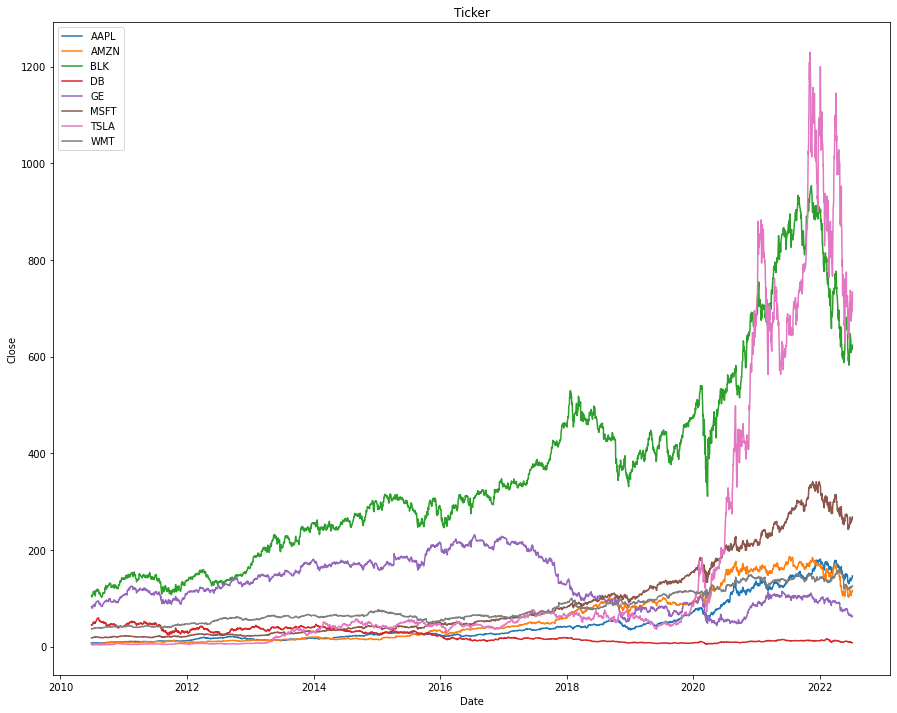

Annual Mean: 
AAPL    0.243922
AMZN    0.255198
BLK     0.147190
DB     -0.142573
GE     -0.023054
MSFT    0.224610
TSLA    0.419221
WMT     0.101409
dtype: float64
Annual Covariance: 
          AAPL      AMZN       BLK        DB        GE      MSFT      TSLA  \
AAPL  0.080034  0.043301  0.037815  0.039089  0.030378  0.042221  0.055940   
AMZN  0.043301  0.103481  0.037934  0.039942  0.027141  0.045094  0.063059   
BLK   0.037815  0.037934  0.077197  0.066495  0.046891  0.040721  0.051778   
DB    0.039089  0.039942  0.066495  0.174703  0.065013  0.040829  0.058905   
GE    0.030378  0.027141  0.046891  0.065013  0.102448  0.029745  0.042033   
MSFT  0.042221  0.045094  0.040721  0.040829  0.029745  0.065529  0.051718   
TSLA  0.055940  0.063059  0.051778  0.058905  0.042033  0.051718  0.321751   
WMT   0.016164  0.014730  0.018620  0.017081  0.012919  0.017520  0.015099   

           WMT  
AAPL  0.016164  
AMZN  0.014730  
BLK   0.018620  
DB    0.017081  
GE    0.012919  
MSFT  0.01

In [32]:
def load_data(tickers):
    consolidated = pd.DataFrame()
    for ticker in tickers:
        df = yf.Ticker(ticker).history(period='max', interval='1d', auto_adjust=True).drop(columns=['Volume', 'Dividends', 'Stock Splits']).rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close'}).round(5)
        df[ticker] = df['close']
        consolidated = pd.concat([consolidated, df[ticker]], axis=1)
    return consolidated.dropna()

def plot_data(dataset, tickers):
    plt.figure(figsize=(15,12))
    plt.plot(dataset)
    plt.title('Ticker')
    plt.xlabel('Date')
    plt.ylabel('Close')
    plt.legend(tickers)
    plt.show()

def calculate_return(dataset):
    log_return = np.log(dataset / dataset.shift(1))
    return log_return

def show_statistics(returns):
    num_trading_days = 252 # On average there are 252 trading days in year.
    print(f"Annual Mean: \n{returns.mean() * num_trading_days}") # If positive then you got positive return.
    print(f"Annual Covariance: \n{returns.cov() * num_trading_days}")

tickers = ["AAPL", "AMZN", "BLK", "DB", "GE", "MSFT", "TSLA", "WMT"]
dataset = load_data(tickers)

print(dataset)
plot_data(dataset, tickers)
show_statistics(calculate_return(dataset))